In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
mpl.rcParams['figure.figsize'] = (17, 10)
mpl.rcParams['axes.grid'] = True

In [2]:
asteroid_data = pd.read_csv('https://dagshub.com/mirsakhawathossain/Asteroid_ML/raw/513ae1bcedd3c4adb056180d7630bc9e09d0626e/Data/sbdb_query_results.csv',low_memory=False).sort_index(axis=0)

In [3]:
asteroid_data.head(5)

,full_name,neo,pha,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.0,MBA
1,2 Pallas (A802 FA),N,N,4.12,513.000,0.1550,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.0,MBA
2,3 Juno (A804 RA),N,N,5.16,246.596,0.2140,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.0,MBA
3,4 Vesta (A807 FA),N,N,3.22,525.400,0.4228,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.0,MBA
4,5 Astraea (A845 XA),N,N,7.00,106.699,0.2740,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.0,MBA


In [4]:
asteroid_data.tail(5)

,full_name,neo,pha,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
1311958,(2023 SB7),Y,N,26.23,NaN,NaN,NaN,0.2989,1.412,0.990,5.87,185.95,139.87,19.31,1.83,0.5876,613.0,9.53,APO
1311959,(2023 SC7),Y,N,23.36,NaN,NaN,NaN,0.2517,1.727,1.292,15.82,190.64,154.93,6.06,2.16,0.4344,829.0,117.00,AMO
1311960,(4847 P-L),N,N,18.04,NaN,NaN,NaN,0.2493,2.424,1.820,5.73,15.03,337.95,252.37,3.03,0.2611,1380.0,318.00,MBA
1311961,(6331 P-L),N,N,18.50,NaN,NaN,NaN,0.2824,2.336,1.676,8.08,355.23,5.25,231.41,3.00,0.2761,1300.0,262.00,MBA
1311962,(6344 P-L),Y,Y,20.40,NaN,NaN,NaN,0.6618,2.821,0.954,4.68,182.81,234.97,130.25,4.69,0.2080,1730.0,14.20,APO


In [5]:
asteroid_data.isnull().sum()

full_name          0
neo                4
pha            11255
H               1230
diameter     1172332
albedo       1173460
rot_per      1277860
e                  0
a                  0
q                  0
i                  0
om                 0
w                  0
ma                 1
ad                 4
n                  0
per                4
moid_ld        11254
class              0
dtype: int64

In [6]:
asteroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311963 entries, 0 to 1311962
Data columns (total 19 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   full_name  1311963 non-null  object 
 1   neo        1311959 non-null  object 
 2   pha        1300708 non-null  object 
 3   H          1310733 non-null  float64
 4   diameter   139631 non-null   float64
 5   albedo     138503 non-null   float64
 6   rot_per    34103 non-null    float64
 7   e          1311963 non-null  float64
 8   a          1311963 non-null  float64
 9   q          1311963 non-null  float64
 10  i          1311963 non-null  float64
 11  om         1311963 non-null  float64
 12  w          1311963 non-null  float64
 13  ma         1311962 non-null  float64
 14  ad         1311959 non-null  float64
 15  n          1311963 non-null  float64
 16  per        1311959 non-null  float64
 17  moid_ld    1300709 non-null  float64
 18  class      1311963 non-null  object 
dtype

In [7]:
dataframe=asteroid_data.drop(columns=['neo','full_name'])

In [8]:
dataframe.head(5)

,pha,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
0,N,3.33,939.400,0.0900,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.0,MBA
1,N,4.12,513.000,0.1550,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.0,MBA
2,N,5.16,246.596,0.2140,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.0,MBA
3,N,3.22,525.400,0.4228,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.0,MBA
4,N,7.00,106.699,0.2740,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.0,MBA


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311963 entries, 0 to 1311962
Data columns (total 17 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   pha       1300708 non-null  object 
 1   H         1310733 non-null  float64
 2   diameter  139631 non-null   float64
 3   albedo    138503 non-null   float64
 4   rot_per   34103 non-null    float64
 5   e         1311963 non-null  float64
 6   a         1311963 non-null  float64
 7   q         1311963 non-null  float64
 8   i         1311963 non-null  float64
 9   om        1311963 non-null  float64
 10  w         1311963 non-null  float64
 11  ma        1311962 non-null  float64
 12  ad        1311959 non-null  float64
 13  n         1311963 non-null  float64
 14  per       1311959 non-null  float64
 15  moid_ld   1300709 non-null  float64
 16  class     1311963 non-null  object 
dtypes: float64(15), object(2)
memory usage: 170.2+ MB


In [12]:
dataframe.isnull().sum()

pha           11255
H              1230
diameter    1172332
albedo      1173460
rot_per     1277860
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                1
ad                4
n                 0
per               4
moid_ld       11254
class             0
dtype: int64

In [13]:
dataframe['diameter'].fillna(dataframe.groupby('class')['diameter'].transform('median'),inplace=True)
dataframe['H'].fillna(dataframe.groupby('class')['H'].transform('median'),inplace=True)
dataframe['albedo'].fillna(dataframe.groupby('class')['albedo'].transform('median'),inplace=True)
dataframe['ma'].fillna(dataframe.groupby('class')['ma'].transform('median'),inplace=True)
dataframe['ad'].fillna(dataframe.groupby('class')['ad'].transform('median'),inplace=True)
dataframe['per'].fillna(dataframe.groupby('class')['per'].transform('median'),inplace=True)
dataframe['moid_ld'].fillna(dataframe.groupby('class')['moid_ld'].transform('median'),inplace=True)
dataframe['rot_per'].fillna(dataframe.groupby('class')['rot_per'].transform('median'),inplace=True)

In [14]:
dataframe.isnull().sum()

pha         11255
H               0
diameter       35
albedo         35
rot_per         0
e               0
a               0
q               0
i               0
om              0
w               0
ma              0
ad              4
n               0
per             4
moid_ld         0
class           0
dtype: int64

In [15]:
dataframe.head(5)

,pha,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
0,N,3.33,939.400,0.0900,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.0,MBA
1,N,4.12,513.000,0.1550,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.0,MBA
2,N,5.16,246.596,0.2140,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.0,MBA
3,N,3.22,525.400,0.4228,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.0,MBA
4,N,7.00,106.699,0.2740,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.0,MBA


In [16]:
dataframe.isnull().sum()

pha         11255
H               0
diameter       35
albedo         35
rot_per         0
e               0
a               0
q               0
i               0
om              0
w               0
ma              0
ad              4
n               0
per             4
moid_ld         0
class           0
dtype: int64

In [19]:
dataframe[['diameter','albedo','ad','per']]=dataframe[['diameter','albedo','ad','per']].fillna(value=dataframe[['diameter','albedo','ad','per']].median())

In [20]:
dataframe.isnull().sum()

pha         11255
H               0
diameter        0
albedo          0
rot_per         0
e               0
a               0
q               0
i               0
om              0
w               0
ma              0
ad              0
n               0
per             0
moid_ld         0
class           0
dtype: int64

In [21]:
dataframe = dataframe.drop(columns=['class'])

In [22]:
dataframe.head(5)

,pha,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld
0,N,3.33,939.400,0.0900,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.0
1,N,4.12,513.000,0.1550,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.0
2,N,5.16,246.596,0.2140,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.0
3,N,3.22,525.400,0.4228,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.0
4,N,7.00,106.699,0.2740,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.0


In [23]:
dataframe['pha'].unique()

array(['N', 'Y', nan], dtype=object)

In [24]:
dataframe['pha'].value_counts()

N    1298338
Y       2370
Name: pha, dtype: int64

In [25]:
dataframe.corr()

,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld
H,1.000000,-0.462445,0.058135,-0.066765,0.355663,-0.022479,-0.440603,-0.096657,0.005277,-0.002599,-0.002354,-0.048872,0.590976,-0.008003,-0.435688
diameter,-0.462445,1.000000,-0.132865,0.037107,-0.062415,0.045906,0.616416,0.048874,-0.006654,0.000428,-0.019843,0.094089,-0.292964,0.022535,0.616551
albedo,0.058135,-0.132865,1.000000,0.035450,-0.035317,-0.005681,-0.093428,0.230202,0.015012,-0.003667,0.004642,-0.011121,0.342436,-0.001601,-0.090615
rot_per,-0.066765,0.037107,0.035450,1.000000,-0.015519,0.000299,0.006433,0.011844,0.000765,0.002130,-0.002337,0.000441,-0.015765,0.000053,0.006222
e,0.355663,-0.062415,-0.035317,-0.015519,1.000000,0.003598,-0.122291,0.124944,0.002087,0.009354,-0.007759,0.040933,0.195398,0.015240,-0.110496
a,-0.022479,0.045906,-0.005681,0.000299,0.003598,1.000000,0.043141,0.007290,-0.001002,0.001074,-0.000757,0.345167,-0.017846,0.332621,0.043248
q,-0.440603,0.616416,-0.093428,0.006433,-0.122291,0.043141,1.000000,0.044237,-0.011259,-0.001820,-0.016303,0.120079,-0.323806,0.016971,0.998918
i,-0.096657,0.048874,0.230202,0.011844,0.124944,0.007290,0.044237,1.000000,-0.014837,-0.004187,-0.011250,0.043464,-0.024771,0.024394,0.053515
om,0.005277,-0.006654,0.015012,0.000765,0.002087,-0.001002,-0.011259,-0.014837,1.000000,-0.151175,-0.001284,0.000602,0.006613,0.001369,-0.011308
w,-0.002599,0.000428,-0.003667,0.002130,0.009354,0.001074,-0.001820,-0.004187,-0.151175,1.000000,-0.004723,-0.000242,0.002653,-0.000557,-0.001782


<AxesSubplot:>

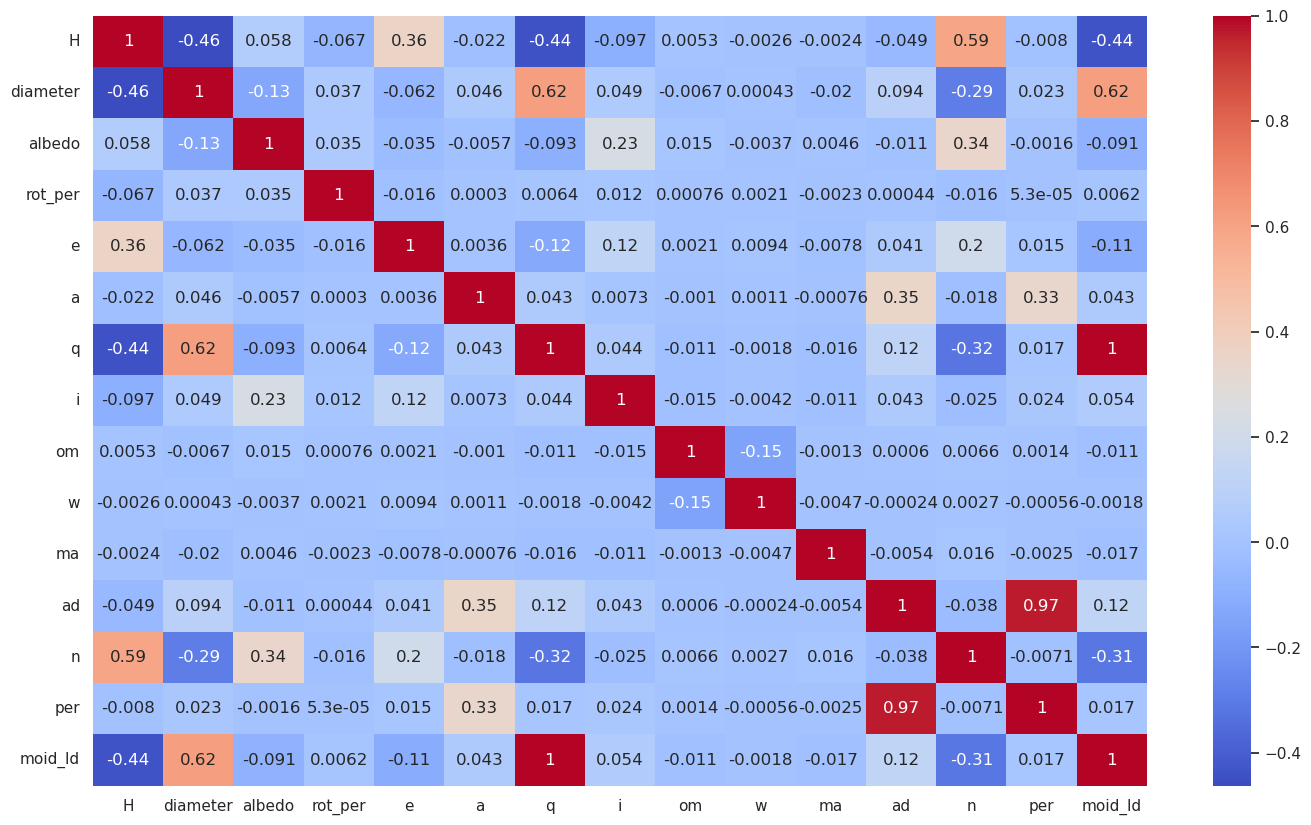

In [26]:
sns.heatmap(dataframe.corr(),cmap='coolwarm',annot=True)

In [234]:
#dataframe.groupby('pha')['diameter'].mean().plot(kind='pie',figsize=(10,10),title='Mean Diameter of Asteroids')
#plt.show()

In [233]:
#dataframe.groupby('pha')['diameter'].mean().plot(kind='bar',figsize=(10,10),title='Mean Diameter of Asteroids')
#plt.show()

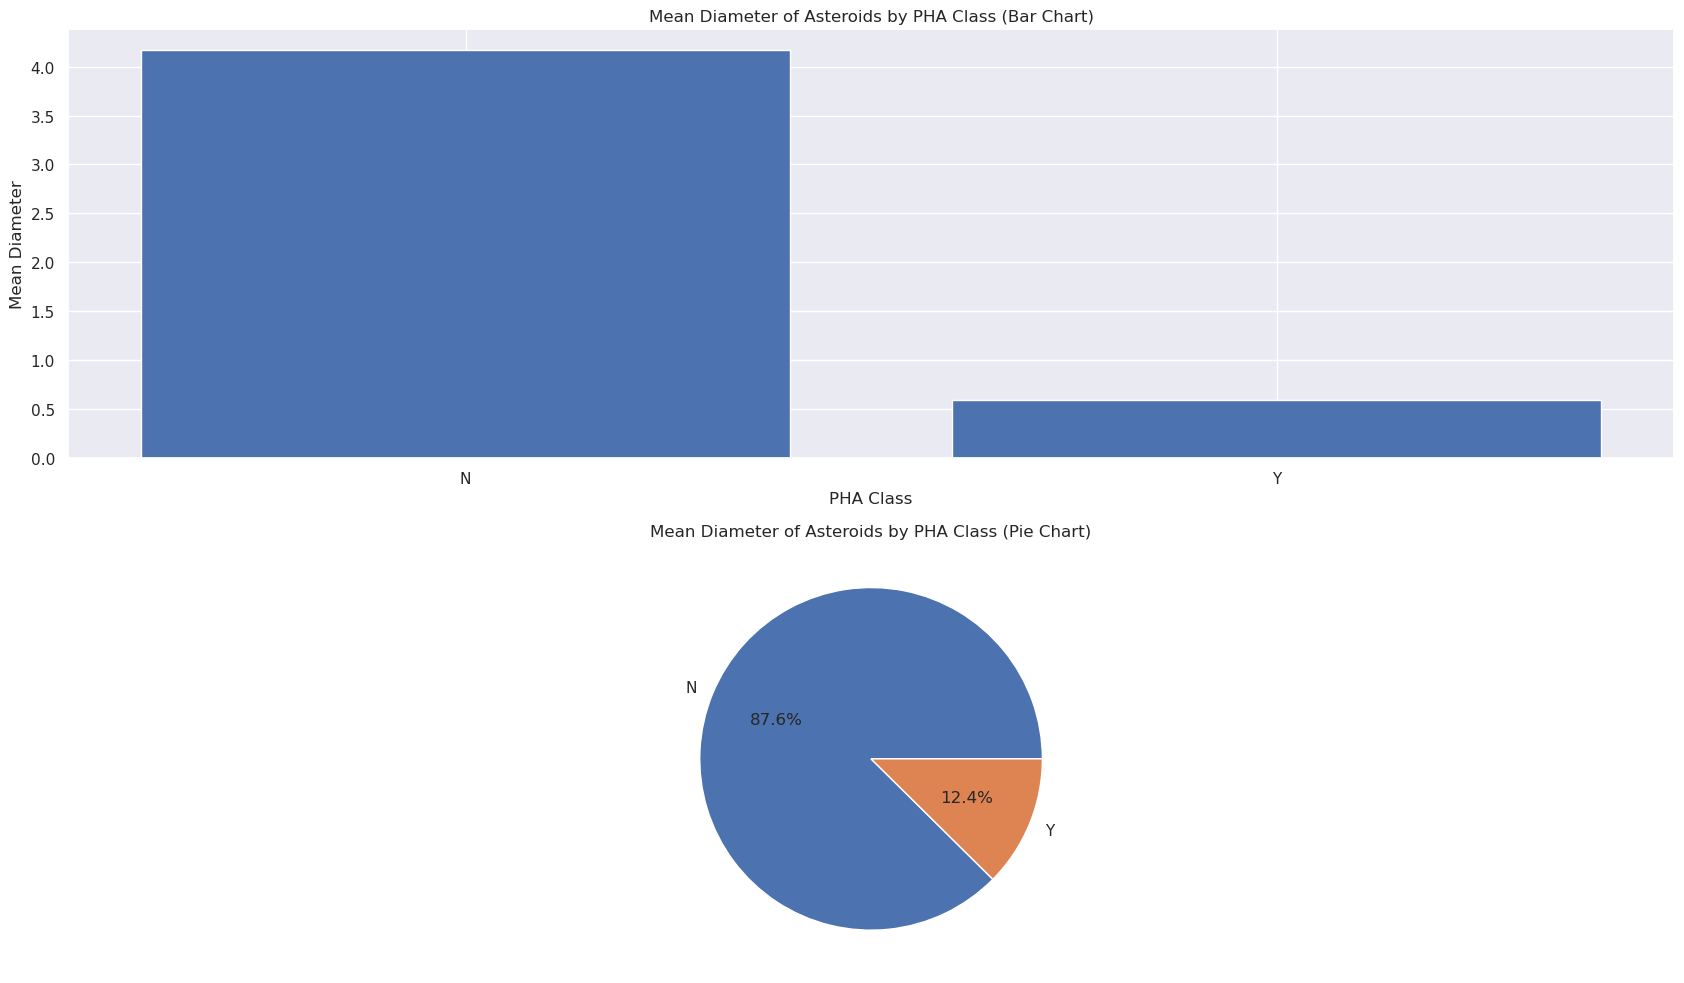

In [27]:
# Calculate the mean diameter of asteroids for each PHA class
mean_diameter_by_pha = dataframe.groupby('pha')['diameter'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2)

# Plot the bar chart in the first subplot
axs[0].bar(mean_diameter_by_pha.index, mean_diameter_by_pha.values)
axs[0].set_xlabel('PHA Class')
axs[0].set_ylabel('Mean Diameter')
axs[0].set_title('Mean Diameter of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1].pie(mean_diameter_by_pha.values, labels=mean_diameter_by_pha.index, autopct="%1.1f%%")
axs[1].set_title('Mean Diameter of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

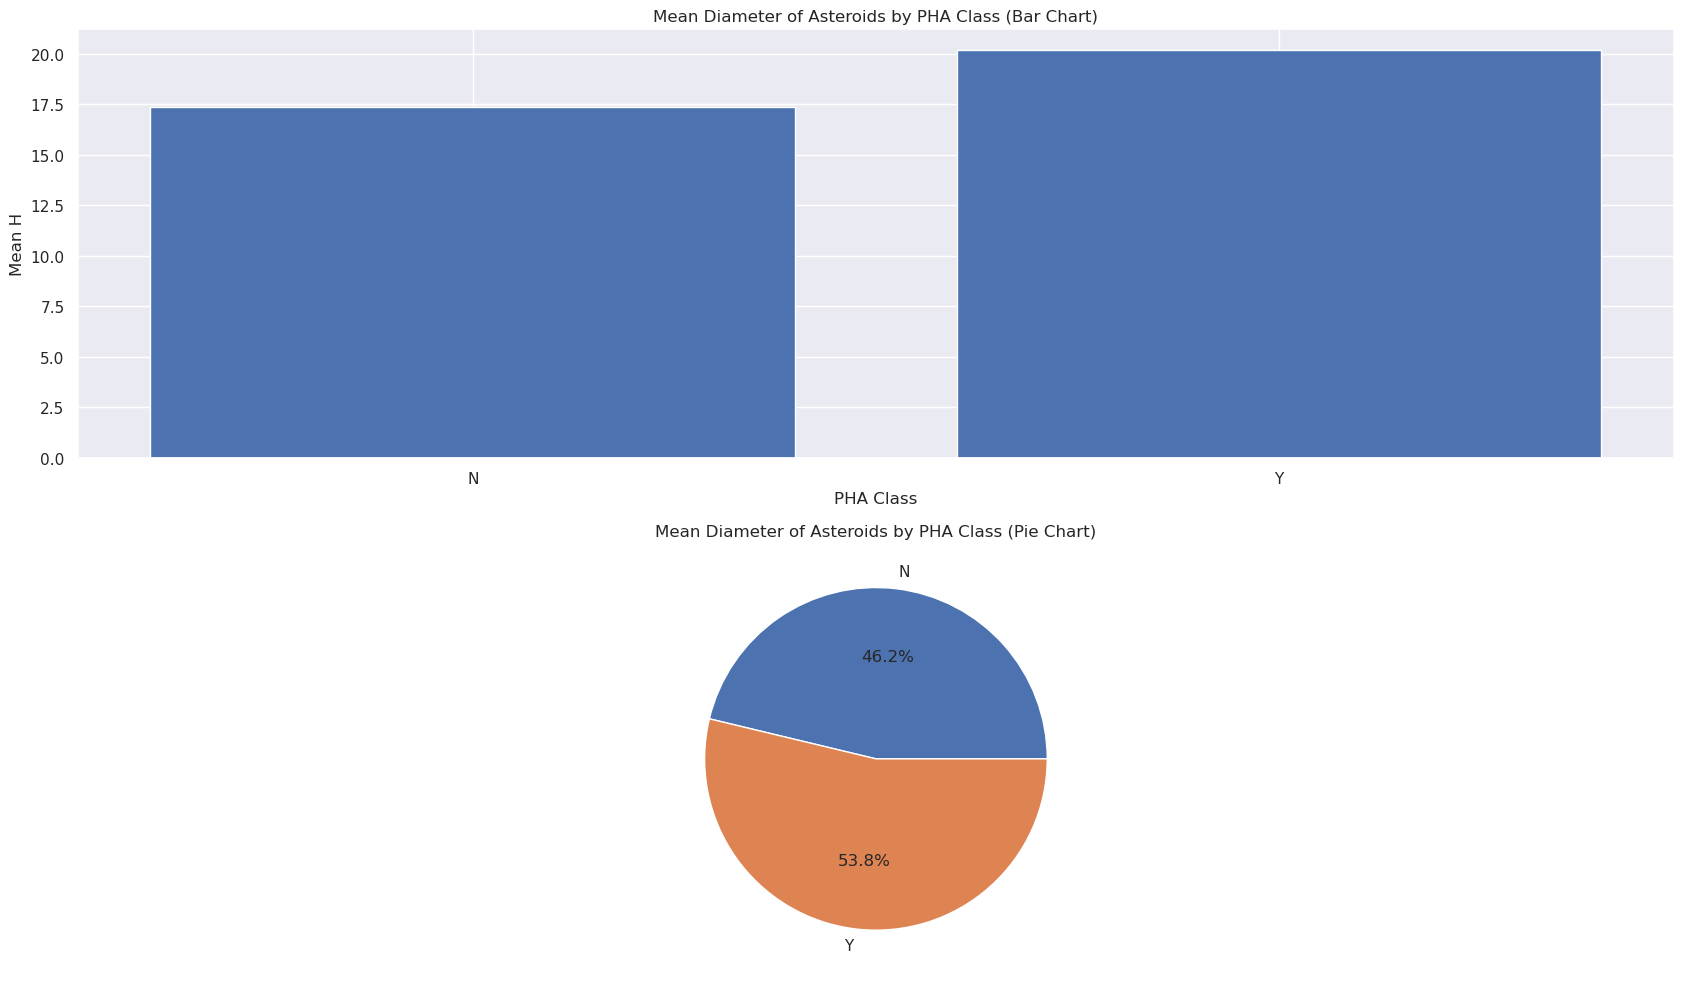

In [28]:
# Calculate the mean diameter of asteroids for each PHA class
mean_diameter_by_pha = dataframe.groupby('pha')['H'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2)

# Plot the bar chart in the first subplot
axs[0].bar(mean_diameter_by_pha.index, mean_diameter_by_pha.values)
axs[0].set_xlabel('PHA Class')
axs[0].set_ylabel('Mean H')
axs[0].set_title('Mean Diameter of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1].pie(mean_diameter_by_pha.values, labels=mean_diameter_by_pha.index, autopct="%1.1f%%")
axs[1].set_title('Mean Diameter of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

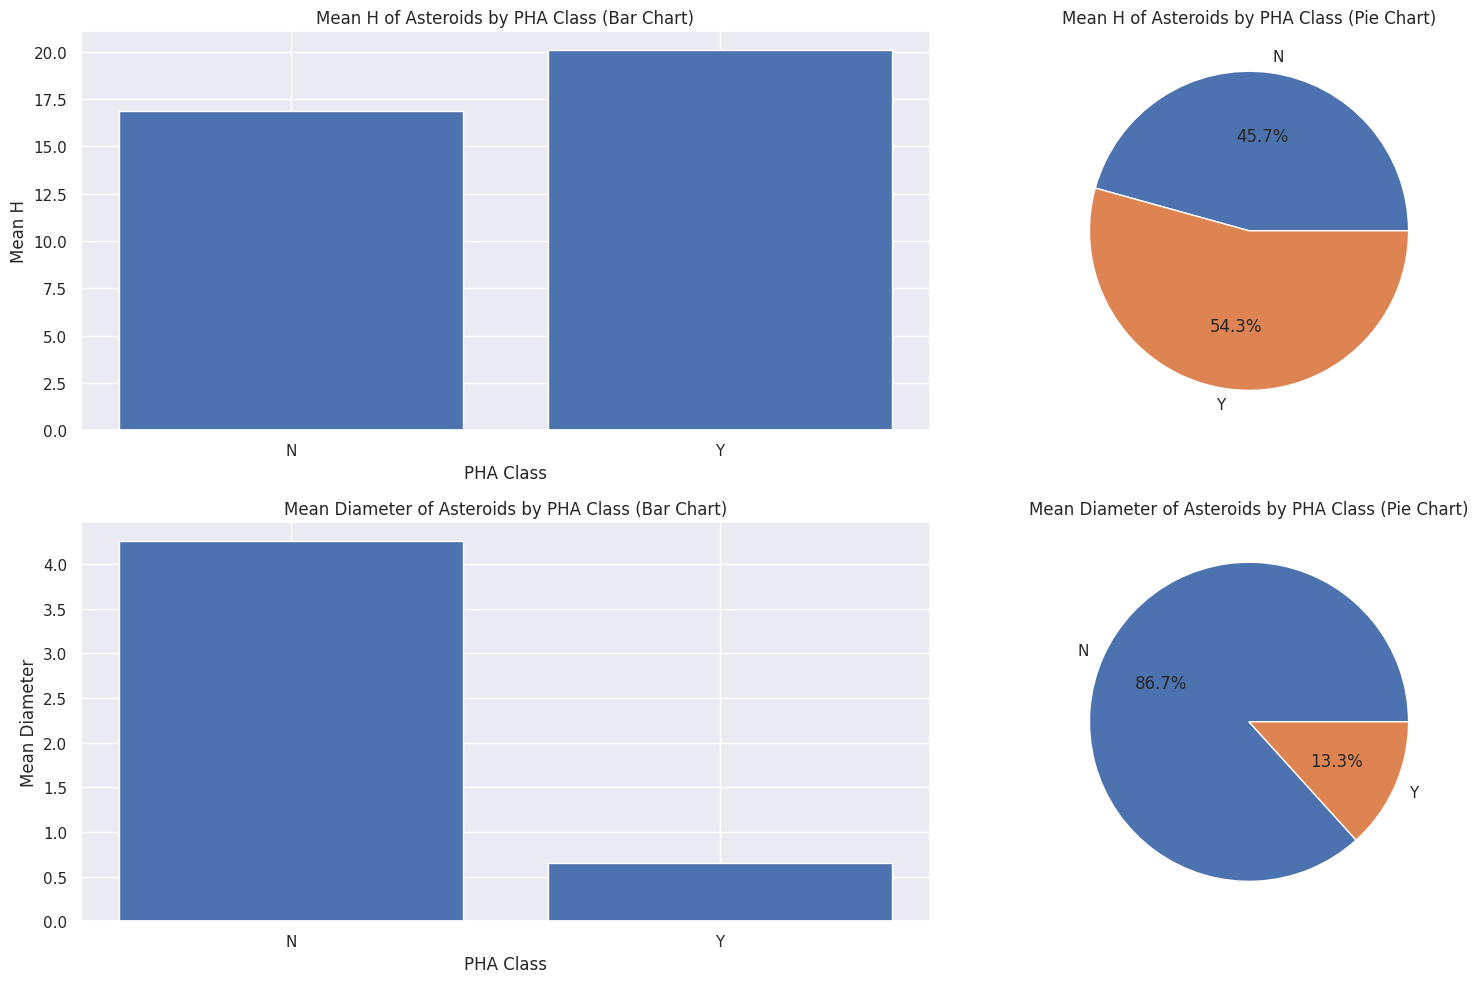

In [241]:
# Calculate the mean diameter of asteroids for each PHA class
mean_H_by_pha = dataframe.groupby('pha')['H'].mean()
mean_diameter_by_pha = dataframe.groupby('pha')['diameter'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2,2)

# Plot the bar chart in the first subplot
axs[0,0].bar(mean_H_by_pha.index, mean_H_by_pha.values)
axs[0,0].set_xlabel('PHA Class')
axs[0,0].set_ylabel('Mean H')
axs[0,0].set_title('Mean H of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[0,1].pie(mean_H_by_pha.values, labels=mean_H_by_pha.index, autopct="%1.1f%%")
axs[0,1].set_title('Mean H of Asteroids by PHA Class (Pie Chart)')

# Plot the bar chart in the first subplot
axs[1,0].bar(mean_diameter_by_pha.index, mean_diameter_by_pha.values)
axs[1,0].set_xlabel('PHA Class')
axs[1,0].set_ylabel('Mean Diameter')
axs[1,0].set_title('Mean Diameter of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1,1].pie(mean_diameter_by_pha.values, labels=mean_diameter_by_pha.index, autopct="%1.1f%%")
axs[1,1].set_title('Mean Diameter of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()



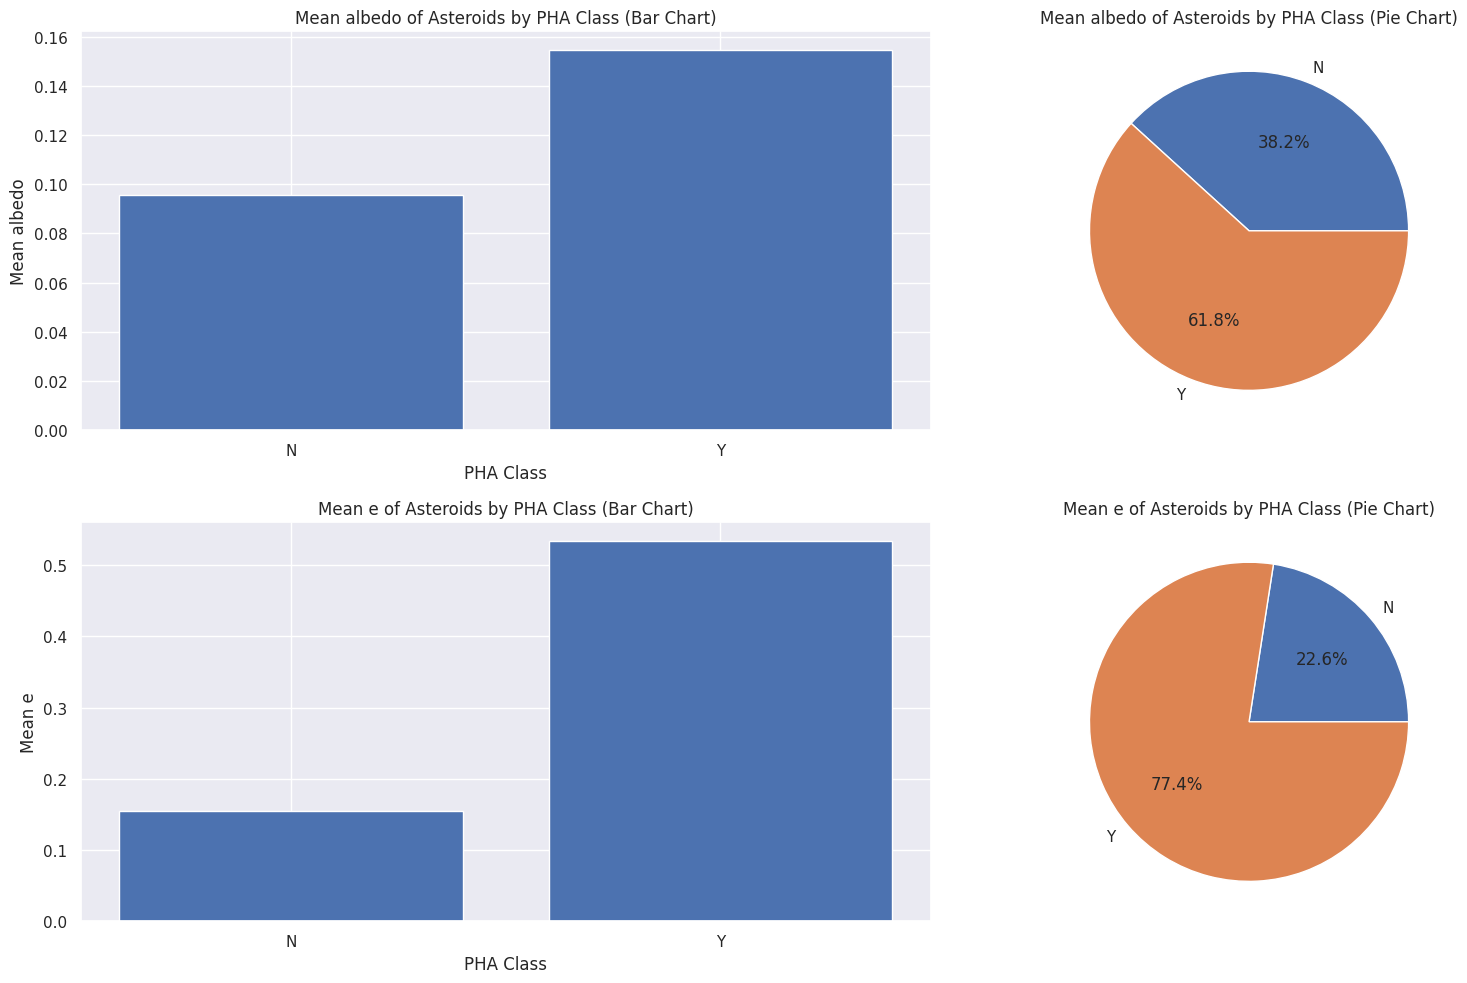

In [243]:
# Calculate the mean diameter of asteroids for each PHA class
mean_albedo_by_pha = dataframe.groupby('pha')['albedo'].mean()
mean_e_by_pha = dataframe.groupby('pha')['e'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2,2)

# Plot the bar chart in the first subplot
axs[0,0].bar(mean_albedo_by_pha.index, mean_albedo_by_pha.values)
axs[0,0].set_xlabel('PHA Class')
axs[0,0].set_ylabel('Mean albedo')
axs[0,0].set_title('Mean albedo of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[0,1].pie(mean_albedo_by_pha.values, labels=mean_albedo_by_pha.index, autopct="%1.1f%%")
axs[0,1].set_title('Mean albedo of Asteroids by PHA Class (Pie Chart)')

# Plot the bar chart in the first subplot
axs[1,0].bar(mean_e_by_pha.index, mean_e_by_pha.values)
axs[1,0].set_xlabel('PHA Class')
axs[1,0].set_ylabel('Mean e')
axs[1,0].set_title('Mean e of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1,1].pie(mean_e_by_pha.values, labels=mean_e_by_pha.index, autopct="%1.1f%%")
axs[1,1].set_title('Mean e of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()



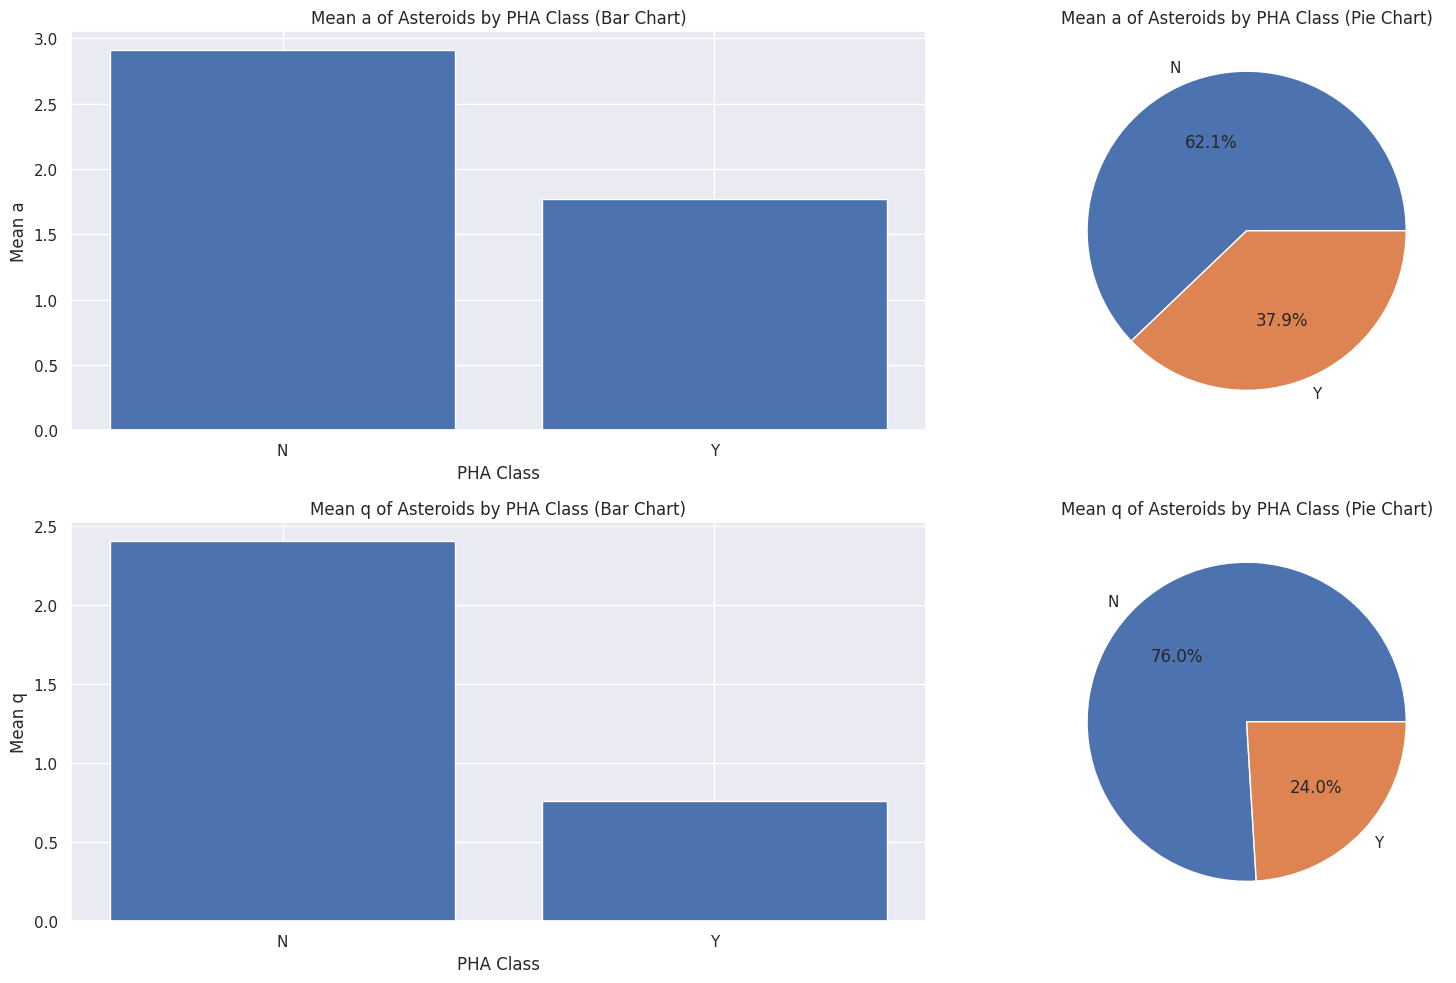

In [244]:
# Calculate the mean diameter of asteroids for each PHA class
mean_a_by_pha = dataframe.groupby('pha')['a'].mean()
mean_q_by_pha = dataframe.groupby('pha')['q'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2,2)

# Plot the bar chart in the first subplot
axs[0,0].bar(mean_a_by_pha.index, mean_a_by_pha.values)
axs[0,0].set_xlabel('PHA Class')
axs[0,0].set_ylabel('Mean a')
axs[0,0].set_title('Mean a of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[0,1].pie(mean_a_by_pha.values, labels=mean_a_by_pha.index, autopct="%1.1f%%")
axs[0,1].set_title('Mean a of Asteroids by PHA Class (Pie Chart)')

# Plot the bar chart in the first subplot
axs[1,0].bar(mean_q_by_pha.index, mean_q_by_pha.values)
axs[1,0].set_xlabel('PHA Class')
axs[1,0].set_ylabel('Mean q')
axs[1,0].set_title('Mean q of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1,1].pie(mean_q_by_pha.values, labels=mean_q_by_pha.index, autopct="%1.1f%%")
axs[1,1].set_title('Mean q of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()



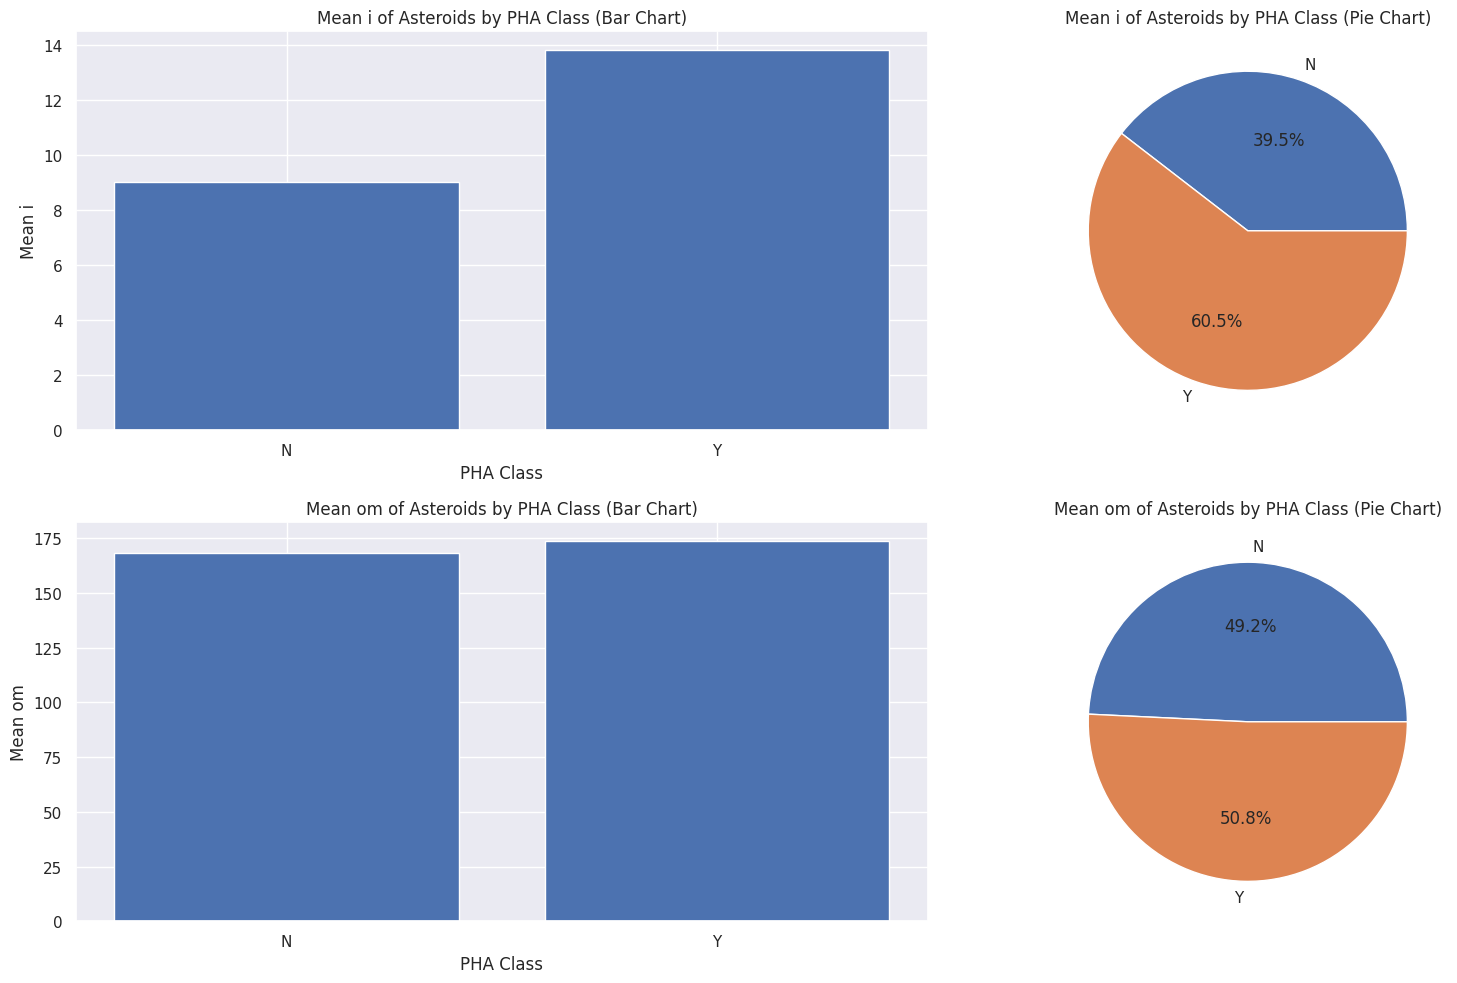

In [245]:
# Calculate the mean diameter of asteroids for each PHA class
mean_i_by_pha = dataframe.groupby('pha')['i'].mean()
mean_om_by_pha = dataframe.groupby('pha')['om'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2,2)

# Plot the bar chart in the first subplot
axs[0,0].bar(mean_i_by_pha.index, mean_i_by_pha.values)
axs[0,0].set_xlabel('PHA Class')
axs[0,0].set_ylabel('Mean i')
axs[0,0].set_title('Mean i of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[0,1].pie(mean_i_by_pha.values, labels=mean_i_by_pha.index, autopct="%1.1f%%")
axs[0,1].set_title('Mean i of Asteroids by PHA Class (Pie Chart)')

# Plot the bar chart in the first subplot
axs[1,0].bar(mean_om_by_pha.index, mean_om_by_pha.values)
axs[1,0].set_xlabel('PHA Class')
axs[1,0].set_ylabel('Mean om')
axs[1,0].set_title('Mean om of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1,1].pie(mean_om_by_pha.values, labels=mean_om_by_pha.index, autopct="%1.1f%%")
axs[1,1].set_title('Mean om of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()



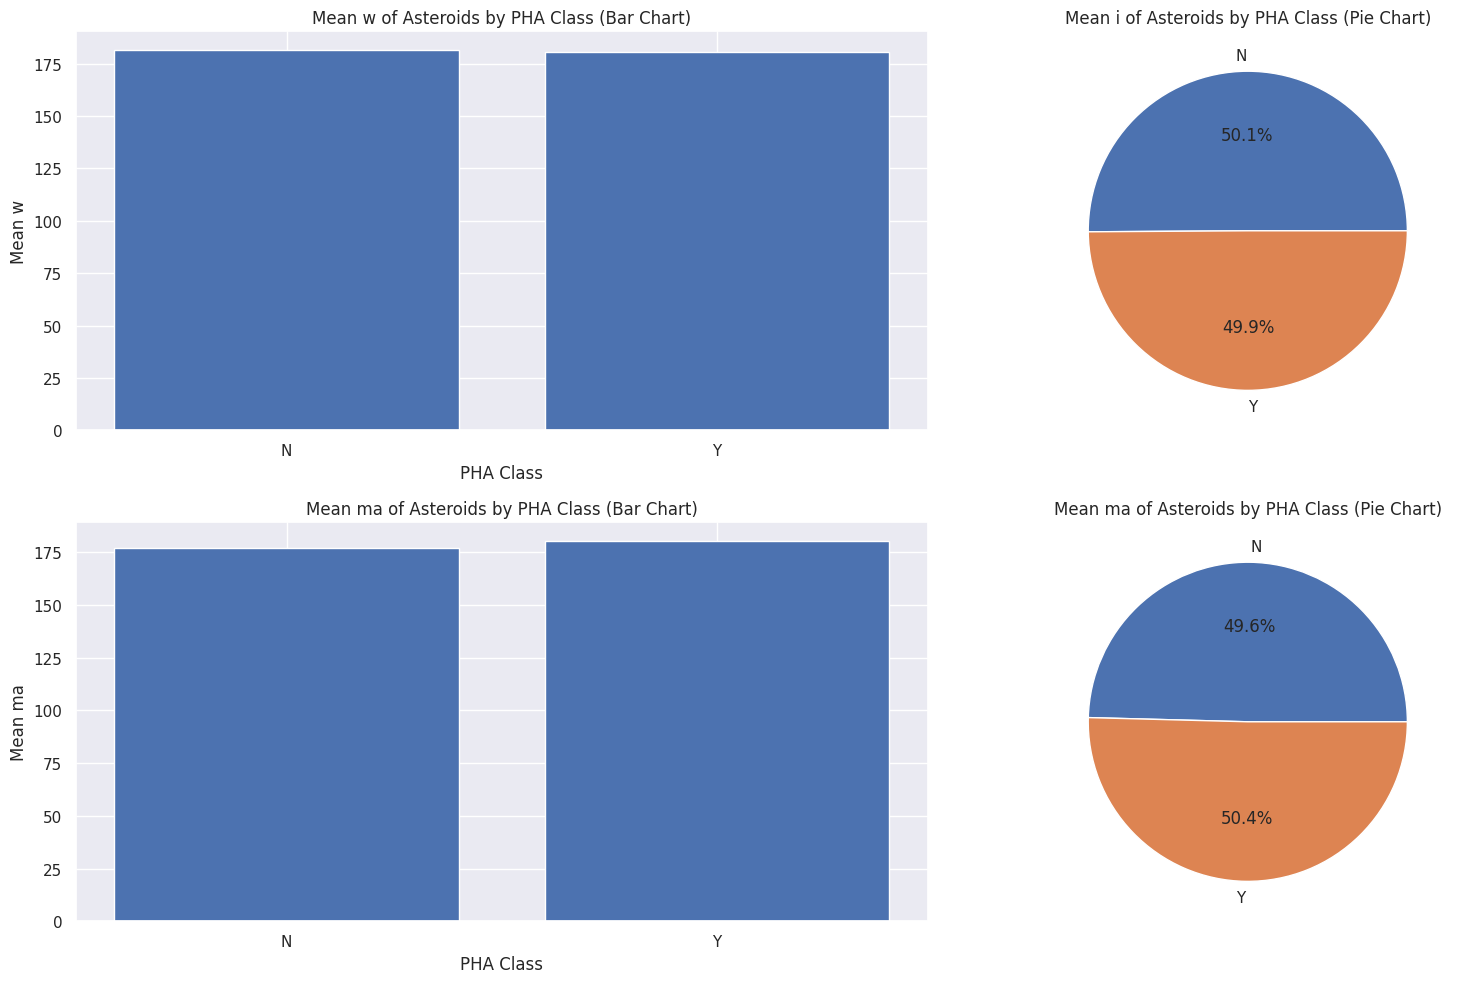

In [246]:
# Calculate the mean diameter of asteroids for each PHA class
mean_w_by_pha = dataframe.groupby('pha')['w'].mean()
mean_ma_by_pha = dataframe.groupby('pha')['ma'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2,2)

# Plot the bar chart in the first subplot
axs[0,0].bar(mean_w_by_pha.index, mean_w_by_pha.values)
axs[0,0].set_xlabel('PHA Class')
axs[0,0].set_ylabel('Mean w')
axs[0,0].set_title('Mean w of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[0,1].pie(mean_w_by_pha.values, labels=mean_w_by_pha.index, autopct="%1.1f%%")
axs[0,1].set_title('Mean i of Asteroids by PHA Class (Pie Chart)')

# Plot the bar chart in the first subplot
axs[1,0].bar(mean_ma_by_pha.index, mean_ma_by_pha.values)
axs[1,0].set_xlabel('PHA Class')
axs[1,0].set_ylabel('Mean ma')
axs[1,0].set_title('Mean ma of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1,1].pie(mean_ma_by_pha.values, labels=mean_ma_by_pha.index, autopct="%1.1f%%")
axs[1,1].set_title('Mean ma of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()



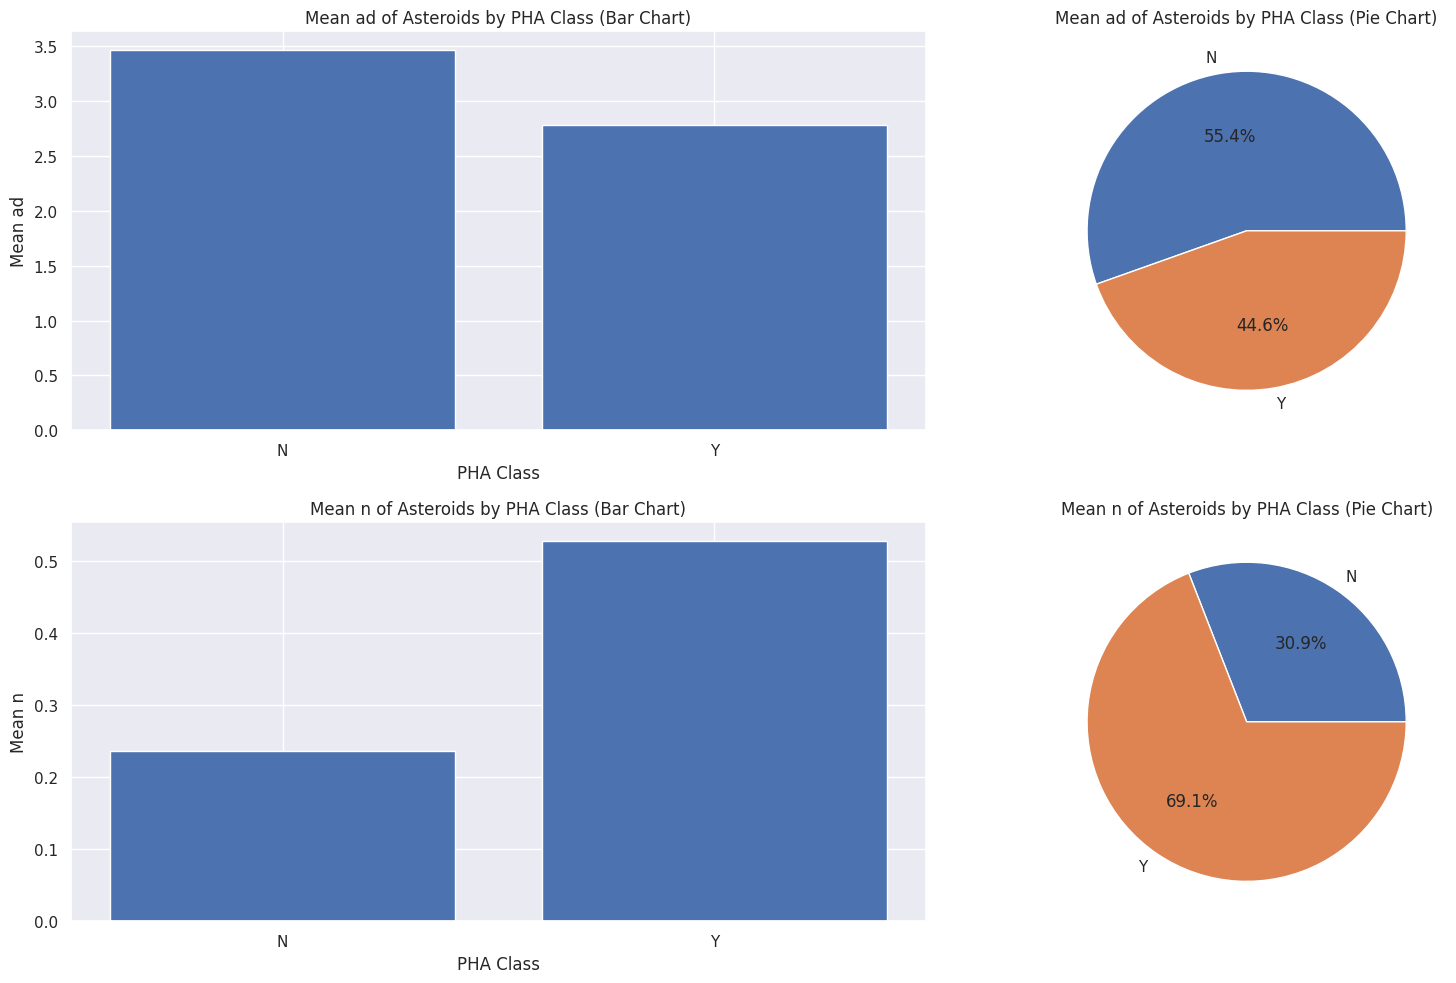

In [247]:
# Calculate the mean diameter of asteroids for each PHA class
mean_ad_by_pha = dataframe.groupby('pha')['ad'].mean()
mean_n_by_pha = dataframe.groupby('pha')['n'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2,2)

# Plot the bar chart in the first subplot
axs[0,0].bar(mean_ad_by_pha.index, mean_ad_by_pha.values)
axs[0,0].set_xlabel('PHA Class')
axs[0,0].set_ylabel('Mean ad')
axs[0,0].set_title('Mean ad of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[0,1].pie(mean_ad_by_pha.values, labels=mean_ad_by_pha.index, autopct="%1.1f%%")
axs[0,1].set_title('Mean ad of Asteroids by PHA Class (Pie Chart)')

# Plot the bar chart in the first subplot
axs[1,0].bar(mean_n_by_pha.index, mean_n_by_pha.values)
axs[1,0].set_xlabel('PHA Class')
axs[1,0].set_ylabel('Mean n')
axs[1,0].set_title('Mean n of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1,1].pie(mean_n_by_pha.values, labels=mean_n_by_pha.index, autopct="%1.1f%%")
axs[1,1].set_title('Mean n of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()



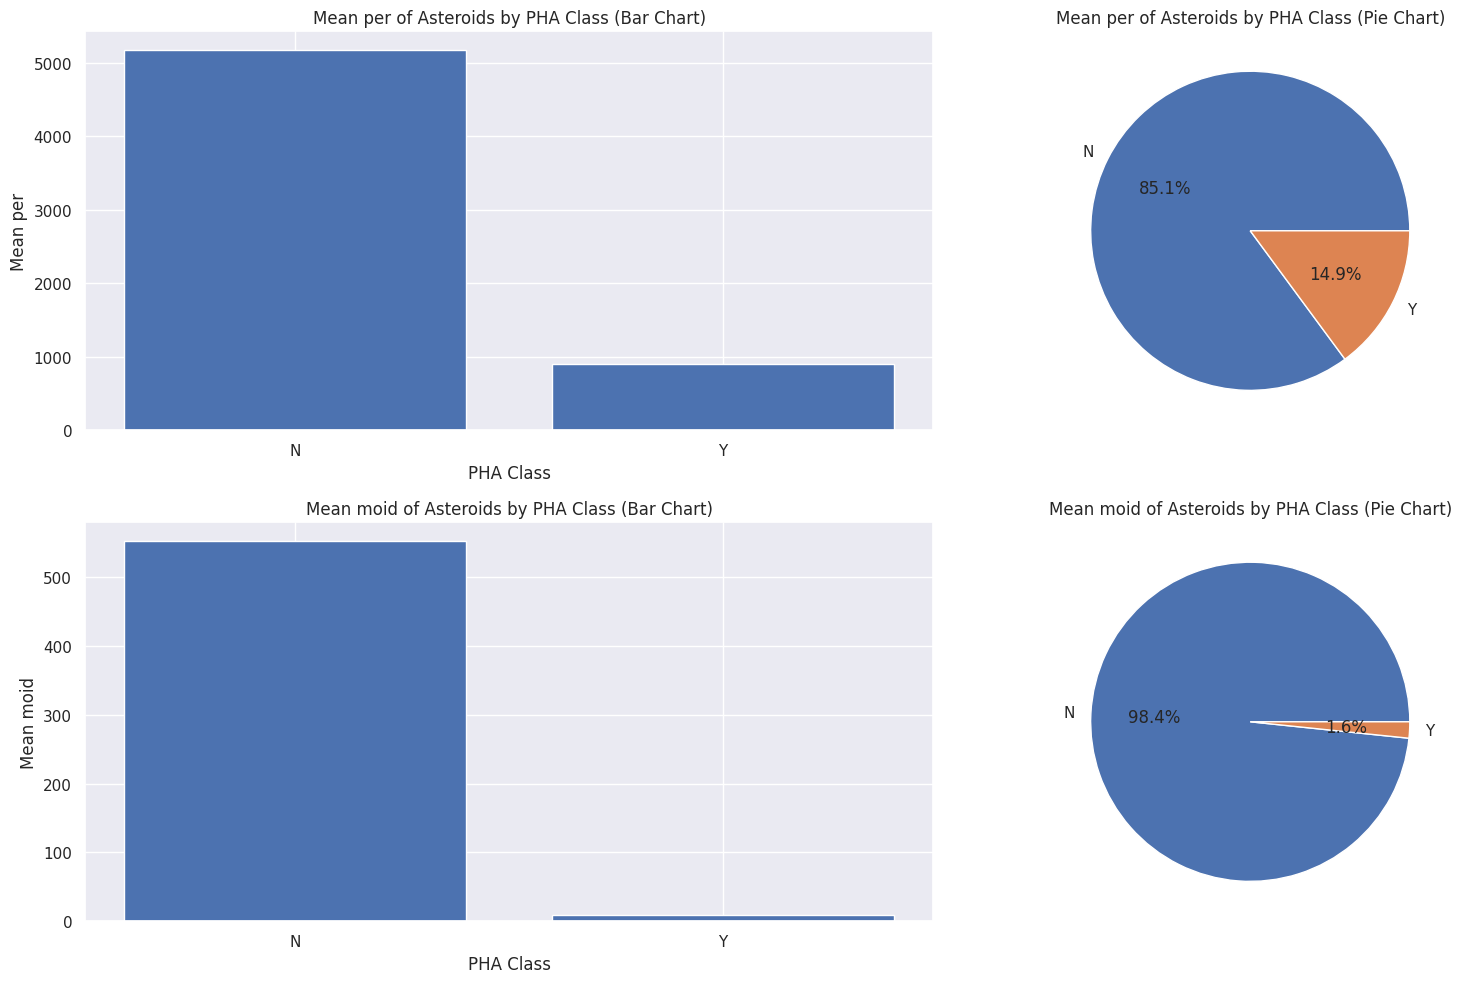

In [248]:
# Calculate the mean diameter of asteroids for each PHA class
mean_per_by_pha = dataframe.groupby('pha')['per'].mean()
mean_moid_by_pha = dataframe.groupby('pha')['moid_ld'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(2,2)

# Plot the bar chart in the first subplot
axs[0,0].bar(mean_per_by_pha.index, mean_per_by_pha.values)
axs[0,0].set_xlabel('PHA Class')
axs[0,0].set_ylabel('Mean per')
axs[0,0].set_title('Mean per of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[0,1].pie(mean_per_by_pha.values, labels=mean_per_by_pha.index, autopct="%1.1f%%")
axs[0,1].set_title('Mean per of Asteroids by PHA Class (Pie Chart)')

# Plot the bar chart in the first subplot
axs[1,0].bar(mean_moid_by_pha.index, mean_moid_by_pha.values)
axs[1,0].set_xlabel('PHA Class')
axs[1,0].set_ylabel('Mean moid')
axs[1,0].set_title('Mean moid of Asteroids by PHA Class (Bar Chart)')

# Plot the pie chart in the second subplot
axs[1,1].pie(mean_moid_by_pha.values, labels=mean_moid_by_pha.index, autopct="%1.1f%%")
axs[1,1].set_title('Mean moid of Asteroids by PHA Class (Pie Chart)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()



In [ ]:
#dataframe['pha_map'] = dataframe.pha.map({'Y':1, 'N':0})

In [ ]:
#y = pd.DataFrame(dataframe['pha_map'])

In [ ]:
#type(y)

In [ ]:
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)
#y_imputer = imputer.fit_transform(y)

In [ ]:
#type(y_imputer)